# Recolección de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline1.png?raw=true"
         width="1000" align="middle">  
</div>

In [2]:
import os
import platform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import keras
from keras.models import Sequential
from keras.utils import to_categorical

from glob import glob
import gdown

### **Whats-Burning dataset:**

El dataset "whats-burning" pesa alrededor de 500Mbytes y contiene 3801 imágenes a color, por un lado imágenes de incendios y/o fuego y por otro lado imágenes donde no hay fuego o simplemente humo. Cada imagen, al ser de color, cada pixel posee 3 canales de profundidad (R, G, B).

Dataset extraído de la página de "Kaggle: Your Machine Learning and Data Science Community"

<a href="https://www.kaggle.com/escofresco/whats-burning"><h4>Dataset source</h4></a>

In [3]:
# Descargar el dataset.
# Aprovechamos la librería gdown para descargar archivos automáticamente desde Google Drive.
# Hacemos uso de la librería os para tener control de la ruta de descarga.
dataset_name = "whats_burning_dataset"

if os.access(dataset_name, os.F_OK) is False:  # Si no se puede acceder al archivo (dataset)
    if os.access(dataset_name + '.zip', os.F_OK) is False: 
        url = "https://drive.google.com/uc?id=1y6SSwmQOGPVn5b7fNjnKIhxOTpajMSmh&export=download"
        output = dataset_name + '.zip'
        gdown.download(url, output, quiet=False)
    
    !unzip -q whats_burning_dataset.zip
    
else:
    print('El dataset ya se encuentra descargado.')

Downloading...
From: https://drive.google.com/uc?id=1y6SSwmQOGPVn5b7fNjnKIhxOTpajMSmh&export=download
To: /content/whats_burning_dataset.zip
521MB [00:05, 88.7MB/s]


In [4]:
# Visualizamos los directorios o carpetas usando la librería "os".
dataset = "./burning" # Nombre de la carpeta general.
dataset_folder = os.listdir(dataset)
dataset_folder

['train', 'test']

In [5]:
# Visualizar el contenido de las carpetas.
train_dir = os.path.join(dataset, 'train')
test_dir= os.path.join(dataset, 'test')
#print(train_dir + '     ' + test_dir)

files = os.listdir(train_dir) # Obtengo las salidas.
print('\n', files)
print('\nEl número de Salidas que voy a tener es:', len(files))


 ['not_fire', 'fire']

El número de Salidas que voy a tener es: 2


In [6]:
# Creo el path de la carpeta de "validation"
validation_dir = os.path.join(dataset, 'validation')

# Creo el directorio de "validation" y sus respectivas carpetas.
try:
  os.mkdir(validation_dir)
  os.mkdir(os.path.join(validation_dir, 'not_fire'))
  os.mkdir(os.path.join(validation_dir, 'fire'))
  
  print("Create the directory {}".format(validation_dir))
  print("Create the directory {}".format(os.path.join(validation_dir, 'not_fire')))
  print("Create the directory {}".format(os.path.join(validation_dir, 'not_fire')))

except OSError as error:
  print(error)

Create the directory ./burning/validation
Create the directory ./burning/validation/not_fire
Create the directory ./burning/validation/not_fire


In [7]:
# Compruebo nuevamente las carpetas del dataset
dataset = "./burning" # Nombre de la carpeta general.
dataset_folder = os.listdir(dataset)
print('Contenido del directorio {} es:\n\n{}'.format(dataset, dataset_folder))

Contenido del directorio ./burning es:

['train', 'test', 'validation']


In [8]:
# Visualizo ahora que la carpeta de "validation" tenga las 
# subcarpetas correspondientes
os.listdir(validation_dir)

['not_fire', 'fire']

#### **Conclusiones**
Ahora tenemos creada la carpeta de "validation" y a su vez la misma está dividida en las categorías correspondientes.

A continuación vamos a exportar algunas imágenes de "train" a "validation" por cada categoría.

In [9]:
# Obtenemos las imágenes de cada categoría de la carpeta "train" usando 
# biblioteca glob
train_notfire_img = glob(train_dir + "/" + files[0] + "/**.jpg")
train_fire_img = glob(train_dir + "/" + files[1] + "/**.jpg")

In [10]:
# Obtengo la cantidad de imágenes de cada categoría:
len(train_notfire_img), len(train_fire_img)

(2098, 924)

In [11]:
# Obtengo 10 imágenes de forma random de cada categoría y las 
# muevo hacia la carpeta "fire" y "not_fire" del directorio
# "validation"
import random
from shutil import move

validation_notfire_imgs = random.sample(train_notfire_img, 10)
for img in validation_notfire_imgs:
  move(src=img, dst=os.path.join(validation_dir, "not_fire"))

validation_fire_imgs = random.sample(train_fire_img, 10)
for img in validation_fire_imgs:
  move(src=img, dst=os.path.join(validation_dir, "fire"))

In [12]:
# Se vuelve a ver la cant. de imágenes de cada categoría del
# directorio "train".
train_notfire_img = glob(train_dir + "/" + files[0] + "/**.jpg")
train_fire_img = glob(train_dir + "/" + files[1] + "/**.jpg")
len(train_notfire_img), len(train_fire_img)

(2088, 914)

In [14]:
# Visulizamos la cant. de imágenes de cada categoría del
# directorio "validation".
validation_notfire_img = glob(validation_dir + "/" + files[0] + "/**.jpg")
validation_fire_img = glob(validation_dir + "/" + files[1] + "/**.jpg")
len(validation_notfire_img), len(validation_fire_img)

(10, 10)

#### **Conclusiones**
Ya hemos tomado y separado algunos de los datos/imágenes de "train" y los hemos agregado en "validation", lo que significa que tenemos datos para validar.

Ahora se procede a visualizar alguna de las imágenes y se procede a ver las características de cada imagen.

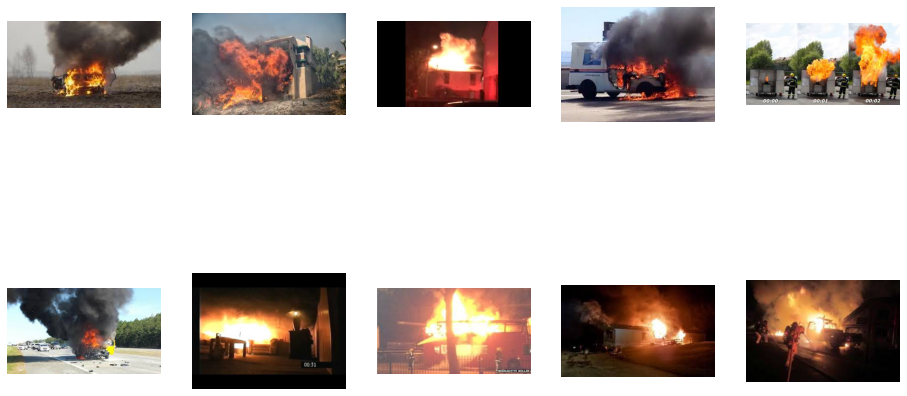

In [15]:
# Visualizar las primeras 10 imágenes de la categoría "fire" de la
# carpeta de "train".
fig1 = plt.figure(figsize=(16, 9))

for i in range(10):
  ax =fig1.add_subplot(2, 5, i+1)
  ax.axis('off')
  img = mpimg.imread(train_fire_img[i])
  plt.imshow(img)

plt.show()

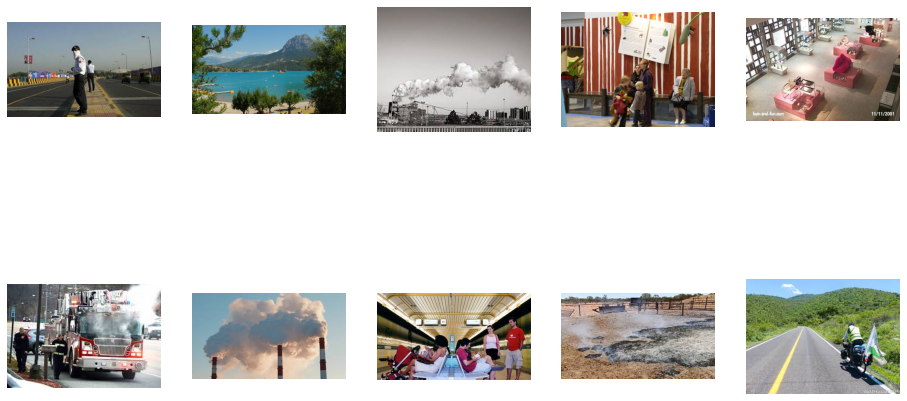

In [16]:
# Visualizar las primeras 10 imágenes de la categoría "not_fire" de la
# carpeta de "train".
fig2 = plt.figure(figsize=(16, 9))

for i in range(10):
  ax =fig2.add_subplot(2, 5, i+1)
  ax.axis('off')
  img = mpimg.imread(train_notfire_img[i])
  plt.imshow(img)

plt.show()

In [17]:
# Visualizamos la dimensión de las 10 imágenes de "fire".
print('Shape:\n')
for i in range(10):
  img = mpimg.imread(train_fire_img[i])
  print(img.shape)

Shape:

(135, 240, 3)
(183, 276, 3)
(168, 300, 3)
(194, 259, 3)
(164, 308, 3)
(168, 300, 3)
(360, 480, 3)
(168, 300, 3)
(173, 291, 3)
(183, 275, 3)


In [18]:
# Visualizamos como están representados los píxeles de
# la 1er imagen de la categoría "fire"
img = mpimg.imread(train_fire_img[0])
print(img[101, 114:122, :])

[[188 122  61]
 [197 134  81]
 [188 129  85]
 [162 108  74]
 [135  84  57]
 [115  64  45]
 [103  54  37]
 [ 97  46  29]]


#### **Conclusiones**
* Las imágenes tienen distinta resolución(tamaño), por  lo tanto hay que utilizar un tamaño único para que todas las imágenes sean iguales (se elije una resolución de 150x150).
* En las imágenes, cada píxel, como se puede observar, están representados de 0 a 255, por lo hay que normalizar los mismos.

In [19]:
# Obtenemos las categorías:
categorias = os.listdir(train_dir)
categorias

['not_fire', 'fire']

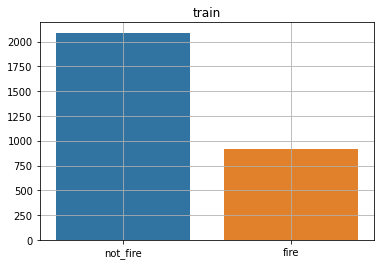

In [20]:
# Realizamos un gráfico de barra para visualizar
# que tan balanceado o desbalanceados están
# las categorías "fire" y "not_fire" de los
# datos de "train".
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('train')
sns.barplot(x=categorias, y=[len(train_notfire_img), len(train_fire_img)], ax=ax)
ax.grid()
plt.show()

#### **Conclusiones**
Observamos que el dataset de "train" está bastante desbalanceado. Hay más imágenes de "not_fire" que de "fire".

Nuestra salida (target) es multicategórica ("not_fire", "fire")

# Procesamiento de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline2.png?raw=true"
         width=1000 aling="middle">
</div>

In [33]:
# Creamos un generador, donde indicamos si deseamos realizar un escalado
# y/o normalización de las imágenes.
from keras.preprocessing.image import ImageDataGenerator

norma = 255   # Definimos la norma.
standard_resolution = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./norma)
validation_datagen = ImageDataGenerator(rescale=1./norma)

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
    directory = validation_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

Found 3021 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [63]:
# Obtengo un diccionario con la cant de clases
train_generator.class_indices

{'fire': 0, 'not_fire': 1}

In [41]:
# Ahora realizamos este paso para obtener los
# índices de las etiquetas y la visualizamos
# como un diccionario.
index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))
index_to_classes

{0: 'fire', 1: 'not_fire'}

#### **Conclusiones**
Hemos creados los generadores, realizamos una normalización de los canales de cada píxel de las imágenes y finalmente modificamos el tamaño de las mismas eligiendo una resolución estándar. Todo esto usando el DataImageGenerator proporcionado por Keras.

# Exploración de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline3.png?raw=true"
         width=1000 aling="middle">
</div>

In [55]:
# El generador "train_generator" se lo puede utilizar para acceder a los datos
# de a cantidad batch de imágenes. En este caso el generador me retornará
# la primera vez las primeras 20 imágenes.
# El generador va a devolver por un lado las 20 1ras imágenes y por otro lado
# la clase a la que pertenece cada una a través del método "next".
batch_imgs, batch_classes = train_generator.next()

In [56]:
# Efectivamente visualizamos que el generador entregó 20 imágenes 
# de 150x150 a color (3 canales).
batch_imgs.shape

(20, 150, 150, 3)

In [57]:
# Visualizamos la clase a la que pertenece cada una de las
# 20 imágenes devueltas por el generador.
batch_classes.shape

(20, 2)

In [80]:
print("Cantidad de imágenes en el batch:", batch_imgs.shape[0])
print("Dimensión de la imagen:", batch_imgs.shape[1:])

Cantidad de imágenes en el batch: 20
Dimensión de la imagen: (150, 150, 3)


In [62]:
print("Cantidad de clases/categorías:", batch_classes.shape[1])

Cantidad de clases/categorías: 2


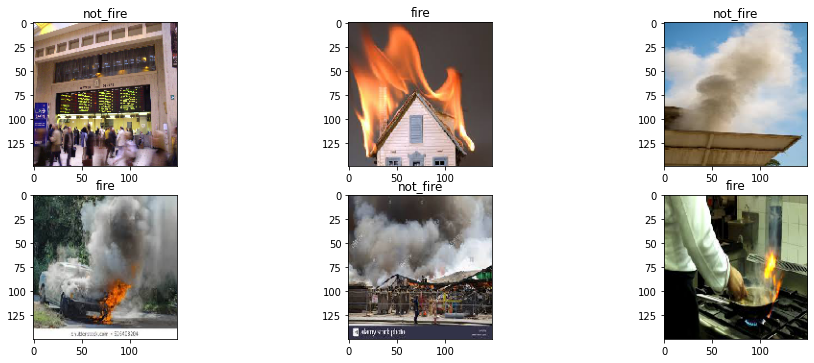

In [74]:
# Visualizamos las primeras 6 imágenes del batch devuelto por el generador.
fig = plt.figure(figsize=(16, 9))
for i in range(6):
  ax = fig.add_subplot(3, 3, i+1)
  ax.axis('on')
  classes_name = batch_classes[i].argmax()  # Obtengo el índice de las etiquetas.
  ax.set_title(index_to_classes.get(classes_name)) # Obtengo las etiquetas.
  ax.imshow((batch_imgs[i]))

plt.show()

#### **Conclusiones**
* Observamos que ahora las imágenes efectivamente son de 150x150.
* El generador ya que encarga de transformar la salida (target), de labels a oneHotEncoding.

#### **Importante**
Una vez que es consumido el generador, los datos (imágenes) desaparecen de memoria, por lo que hay que volver a crear el generador.

In [76]:
# Volvemos a crear el generador de "train"
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))


Found 3021 images belonging to 2 classes.


# Entrenamiento del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline4.png?raw=true"
         width=1000 aling="middle">
</div>

In [82]:
# input shape (observado del análisis de datos)
in_shape = batch_imgs.shape[1:]
in_shape

(150, 150, 3)

In [84]:
# output shape (observado del análisis de datos)
out_shape = batch_classes.shape[1]
out_shape

2

#### **Importante**
Cuando nosotros usamos ImageDataGenerator el sistema no sabe de antemano el tamaño del batch, es decir, no sabe cuantas imágenes va a leer por épocas (por ciclos de entrenamiento), por lo tanto se lo tenemos que decir.

In [95]:
# Debemos definir cuántas imágenes se consumirán por
# época (step_per_epoch) ya que estando el generador
# en el medio Keras no puede saberlo por su cuenta.

# El resultado equivale a dividir la cant. total de 
# imágenes que hay en el directorio de "train" dividido
# el tamaño del batch. (en este caso: 3021 / 20)

step_per_epoch_train = len(train_generator)
step_per_epoch_train

152

# Validación del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline5.png?raw=true"
         width=1000 aling="middle">
</div>

# Aplicación del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline6.png?raw=true"
         width=1000 aling="middle">
</div>

# Conclusiones.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline7.png?raw=true"
         width=1000 aling="middle">
</div>